In [2]:
import rebound
print(rebound.__build__)
import numpy as np
import warnings
import glob
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    %matplotlib inline
    import matplotlib.pyplot as plt
from ctypes import cdll, byref
cgr = cdll.LoadLibrary("gr_force.so")

Dec  5 2016 09:44:56


In [3]:
def setup(sim):
    sim.additional_forces=cgr.gr_force
def gr_potential(sim):
    source = sim.particles[0]
    mu = sim.G*source.m
    prefac = 3.*mu*mu/1.0130251e+08
    grpot = 0.
    for i in range(1,sim.N):
        pi = sim.particles[i] - source
        r2 = pi.x*pi.x + pi.y*pi.y + pi.z*pi.z
        grpot -= prefac*sim.particles[i].m/r2
    return grpot

In [13]:
sas = []
for f in glob.glob("/Users/rein/git/ss_lab1/physicsLab/b4abe6b_*/*.bin"):
    sas.append(rebound.SimulationArchive(f,setup=setup))
print(len(sas))
sas2 = []
for f in glob.glob("/Users/rein/git/ss_lab1/physicsLab/ec52c93_*/*.bin"):
    sas2.append(rebound.SimulationArchive(f,setup=setup))
print(len(sas2))
sas3 = []
for f in glob.glob("/Users/rein/git/ss_lab1/physicsLab/8177128_*/*.bin"):
    sas3.append(rebound.SimulationArchive(f,setup=setup))
print(len(sas3))

176
124
176


In [11]:
saref = rebound.SimulationArchive("/Users/rein/git/ss_lab1/restart_0051.bin",setup=setup)

/Users/rein/git/rebound/rebound/simulationarchive.py:63: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(BINARY_WARNINGS[1][0], RuntimeWarning)


0.09090909090909091


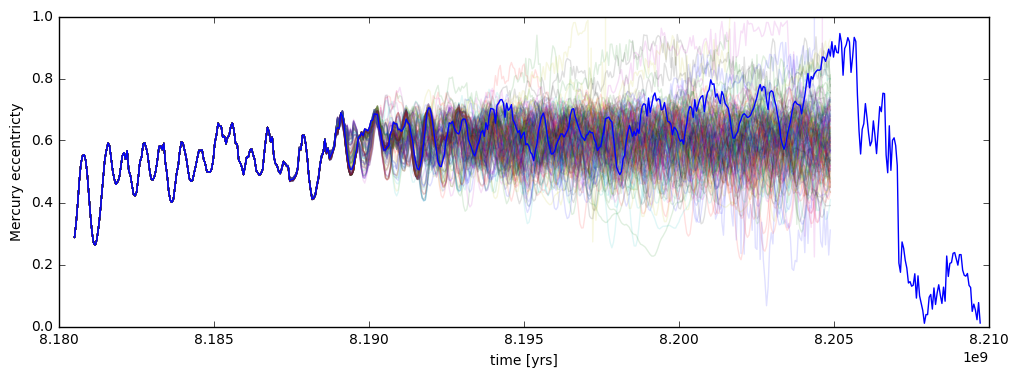

In [9]:
fig = plt.figure(figsize=(12, 4)) 
ax = plt.subplot(111)
ax.set_ylim([0.,1.])
ax.set_xlabel("time [yrs]")
ax.set_ylabel("Mercury eccentricty")
numhe = 0
for sa in sas:
    data = np.zeros((2,len(sa)))
    he = 0
    for i, sim in enumerate(sa):
        data[0][i] = sim.t/2/np.pi
        e = sim.particles[1].e
        if e >0.85:
            he = 1
        data[1][i] = e
    if he==1:
        numhe +=1
    ax.plot(data[0], data[1],alpha=0.12);
times = np.linspace(sas[0].tmin,sas[0].tmax + 0.2*(sas[0].tmax-sas[0].tmin),800)
data = np.zeros((2,len(times)))
for i, t in enumerate(times):
    sim = saref.getSimulation(t) 
    data[0][i] = sim.t/2/np.pi
    e = sim.particles[1].e
    data[1][i] = e
ax.plot(data[0], data[1],color="blue");
print(numhe/len(sas))

0.045454545454545456


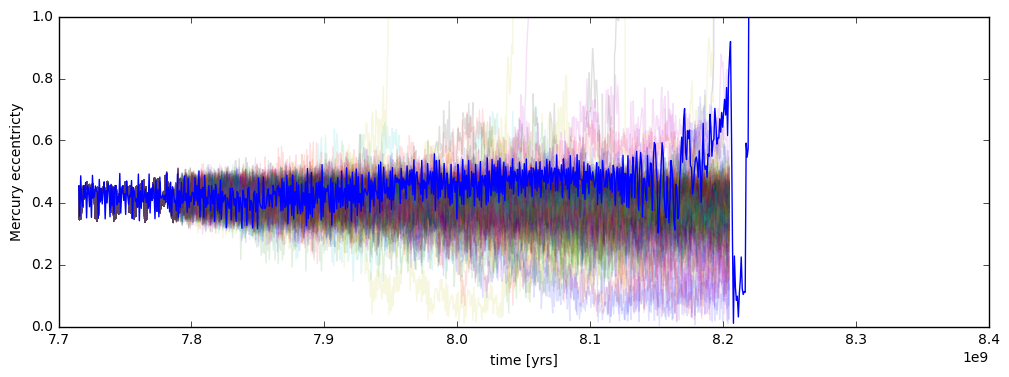

In [16]:
fig = plt.figure(figsize=(12, 4)) 
ax = plt.subplot(111)
ax.set_ylim([0.,1.])
ax.set_xlabel("time [yrs]")
ax.set_ylabel("Mercury eccentricty")
numhe = 0
times = np.linspace(sas2[0].tmin,sas2[0].tmax,800)
for sa in sas2:
    data = np.zeros((2,len(times)))
    he = 0
    for i, sim in enumerate(sa.getSimulations(times)):
        data[0][i] = sim.t/2/np.pi
        e = sim.particles[1].e
        if e >0.85:
            he = 1
        data[1][i] = e
    if he==1:
        numhe +=1
    ax.plot(data[0], data[1],alpha=0.12);
times = np.linspace(sas2[0].tmin,sas2[0].tmax + 0.2*(sas2[0].tmax-sas2[0].tmin),800)
data = np.zeros((2,len(times)))
for i, t in enumerate(times):
    sim = saref.getSimulation(t) 
    data[0][i] = sim.t/2/np.pi
    e = sim.particles[1].e
    data[1][i] = e
ax.plot(data[0], data[1],color="blue");
print(numhe/len(sas))

0.03409090909090909


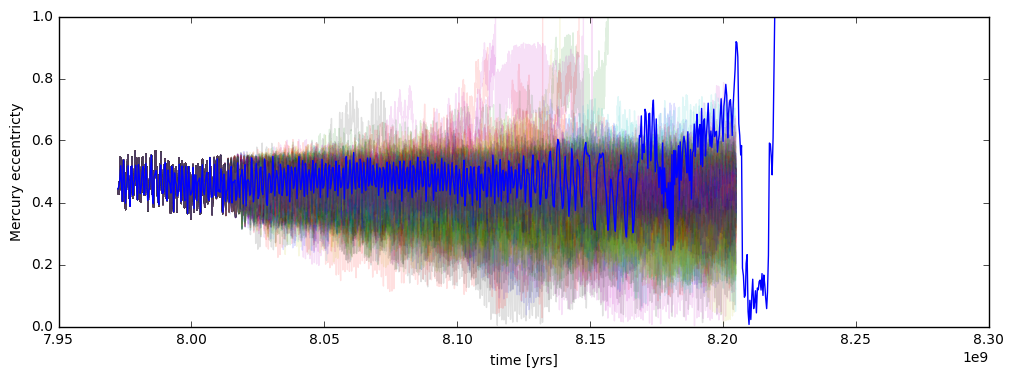

In [14]:
fig = plt.figure(figsize=(12, 4)) 
ax = plt.subplot(111)
ax.set_ylim([0.,1.])
ax.set_xlabel("time [yrs]")
ax.set_ylabel("Mercury eccentricty")
numhe = 0
for sa in sas3:
    data = np.zeros((2,len(sa)))
    he = 0
    for i, sim in enumerate(sa):
        data[0][i] = sim.t/2/np.pi
        e = sim.particles[1].e
        if e >0.85:
            he = 1
        data[1][i] = e
    if he==1:
        numhe +=1
    ax.plot(data[0], data[1],alpha=0.12);
times = np.linspace(sas3[0].tmin,sas3[0].tmax + 0.2*(sas2[0].tmax-sas3[0].tmin),800)
data = np.zeros((2,len(times)))
for i, t in enumerate(times):
    sim = saref.getSimulation(t) 
    data[0][i] = sim.t/2/np.pi
    e = sim.particles[1].e
    data[1][i] = e
ax.plot(data[0], data[1],color="blue");
print(numhe/len(sas))